## **GRIP @ The Sparks Foundation**
## **Author: Sanjoy Paul**
### **Domain: Data Science & Business Analytics**
### **Task-1: Prediction Using supervised Machine Learning**
#### **Dataset: http://bit.ly/w-data**

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

### **Reading the Data**

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:>

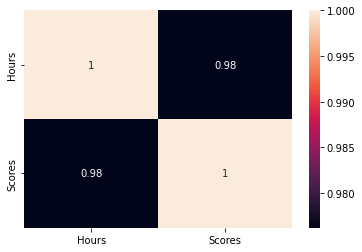

In [7]:
sns.heatmap(df.corr(),annot=True)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

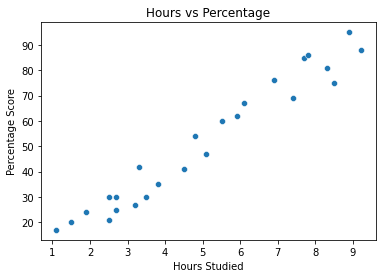

In [8]:
sns.scatterplot(data=df,x='Hours', y='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [11]:
print('Shape of Training Feature:',X_train.shape)
print('Shape of Testing Feature:',X_test.shape)
print('Shape of Training Label:',y_train.shape)
print('Shape of Testting Label:',y_test.shape)

Shape of Training Feature: (20, 1)
Shape of Testing Feature: (5, 1)
Shape of Training Label: (20,)
Shape of Testting Label: (5,)



### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)
model.predict(X_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

#### **Testing Accuarcy**

In [14]:
model.score(X_test,y_test)

0.9454906892105356

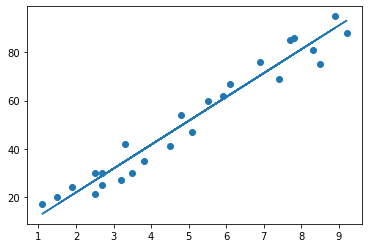

In [15]:
line = model.coef_*X+model.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


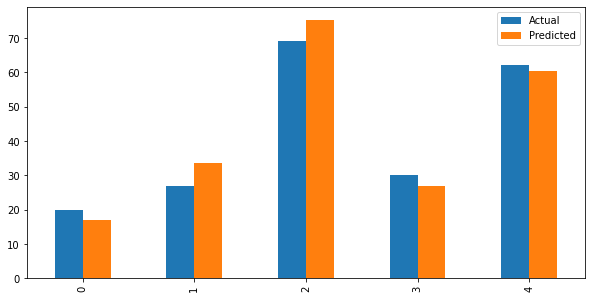

In [18]:
df.plot(kind='bar')
plt.gcf().set_size_inches((10, 5))
plt.show()

In [19]:
hours = 9.25
predction = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R2 Score:',r2_score(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))

R2 Score: 0.9454906892105356
Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


### Conclusion
##### I was successfully able to carry-out Prediction using Supervised Machine Learning task and was able to evaluate the model's performance on various parameters.

## Thank You